<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/SML_3_1_Cross_Validation_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CROSS VALIDATION: AUTO DATA

## **LOAD AND EXPLORE DATA**


**WORKING ENVIRONMENT SET UP**

In [4]:
#Utils
import math

#Data manipulation
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**READ DATA**


In [0]:
data = pd.read_csv('Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix
1,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
2,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
3,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom
4,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala


**EXPLORE DATA**


**Analize data set:**

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [0]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Plot data:**

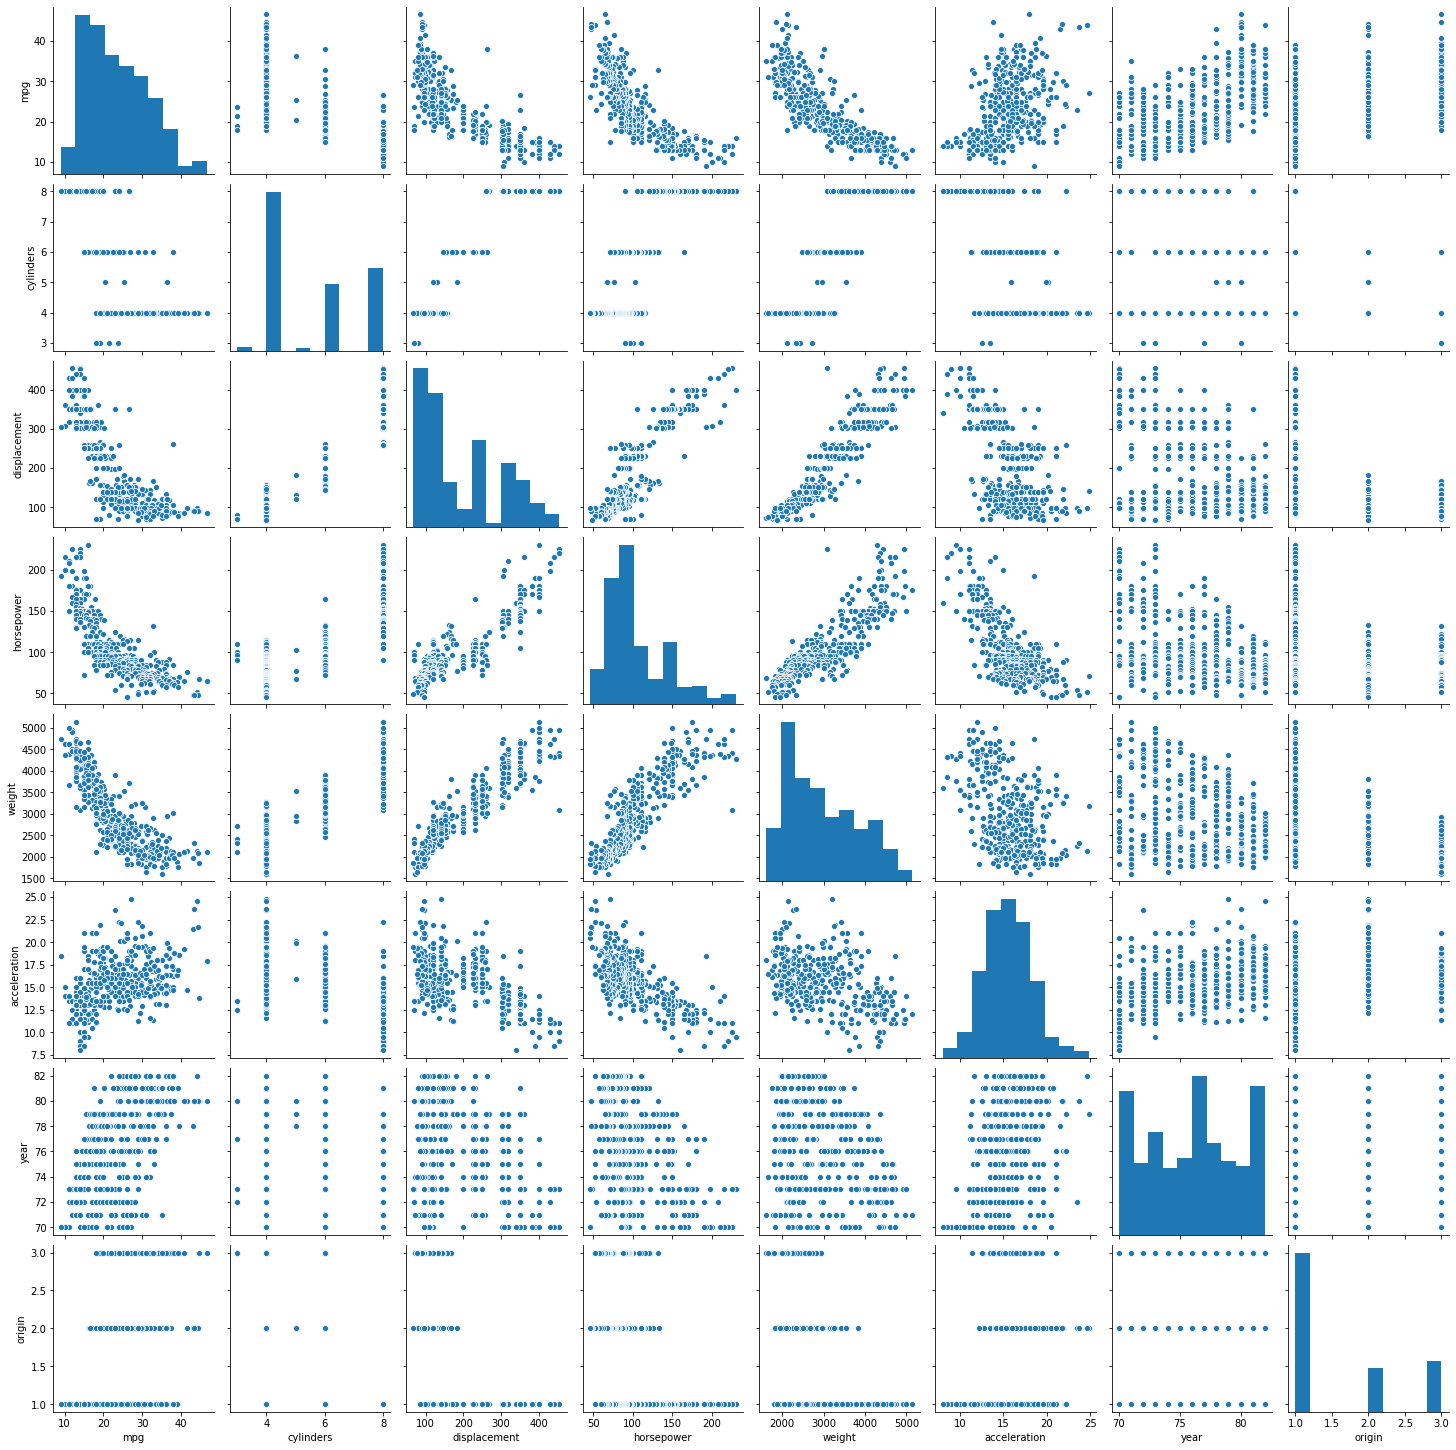

In [0]:
sns.pairplot(data)

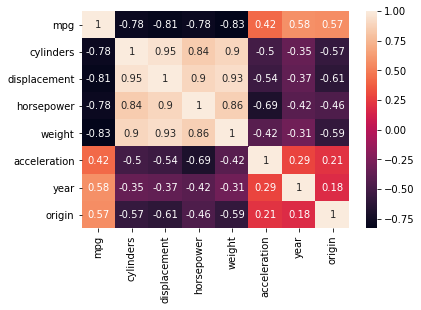

In [0]:
sns.heatmap(data.corr(),annot=True)

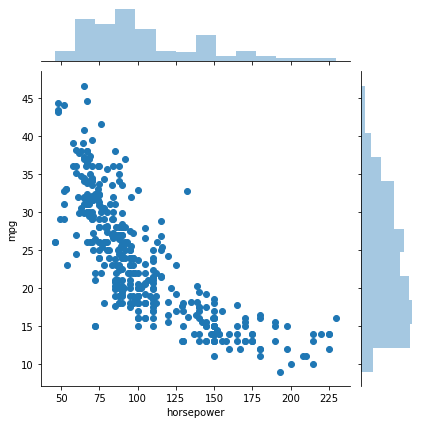

In [0]:
sns.jointplot(data=data,y='mpg',x='horsepower')

## **VALIDATION SET**

### **SINGLE SPLIT**

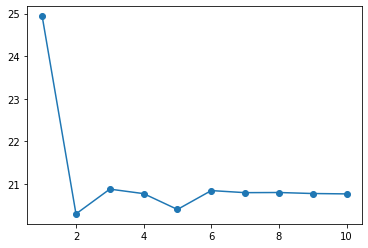

In [0]:
# Random sample -> 50%
train = data.sample(frac=0.5, random_state=100)
test = data.drop(train.index)
X_train = train[['horsepower']]
y_train =  train[['mpg']]
X_test = test[['horsepower']]
y_test =  test[['mpg']]
mse_vset_1 = list()
# For degree 1 to 10
for i in range(1,11):
  # Train model
  model = LinearRegression() 
  poly = PolynomialFeatures(degree = i) 
  X_train_poly = poly.fit_transform(X_train) 
  model.fit(X_train_poly, y_train)
  # Predict
  predictions = model.predict(poly.fit_transform(X_test))
  # Calculate MSE
  mse_vset_1.append(metrics.mean_squared_error(y_test,predictions))

results_vset_1 = pd.DataFrame()
results_vset_1['degree'] = range(1,11)
results_vset_1['MSE'] = mse_vset_1
plt.plot(results_vset_1['degree'],results_vset_1['MSE'])
plt.scatter(results_vset_1['degree'],results_vset_1['MSE'])



### **SEVERAL SPLITS**

In [2]:
import pandas as pd
from google.colab import files
files.upload()
data = pd.read_csv('Auto.csv')
data.head()

Saving Auto.csv to Auto (1).csv


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix
1,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
2,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
3,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom
4,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala


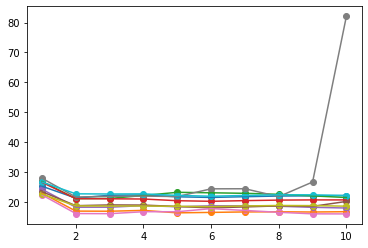

In [9]:
# Repeat process 10 times with different random samples and compare

# Random sample -> 50%
for sample in range(1,11):
  train = data.sample(frac=0.5)#, random_state=100)
  test = data.drop(train.index)
  X_train = train[['horsepower']]
  y_train =  train[['mpg']]
  X_test = test[['horsepower']]
  y_test =  test[['mpg']]
  mse_vset_sample = list()
  # For degree 1 to 10
  for i in range(1,11):
    # Train model
    model = LinearRegression() 
    poly = PolynomialFeatures(degree = i) 
    X_train_poly = poly.fit_transform(X_train) 
    model.fit(X_train_poly, y_train)
    # Predict
    predictions = model.predict(poly.fit_transform(X_test))
    # Calculate MSE
    mse_vset_sample.append(metrics.mean_squared_error(y_test,predictions))

  results_vset_sample = pd.DataFrame()
  results_vset_sample['degree'] = range(1,11)
  results_vset_sample['MSE'] = mse_vset_sample
  plt.plot(results_vset_sample['degree'],results_vset_sample['MSE'])
  plt.scatter(results_vset_sample['degree'],results_vset_sample['MSE'])





##**CROSS-VALIDATION**



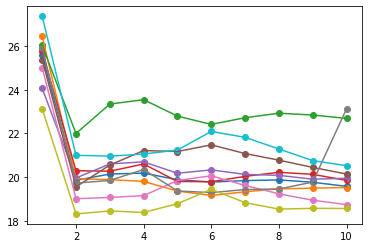

In [13]:
## Try k = 5 and k = 10 and compare

# Repeat process 10 times with different random samples and compare

# Random sample -> 50%
for sample in range(1,11):
  train = data.sample(frac=0.5)#, random_state=100)
  test = data.drop(train.index)
  X_train = train[['horsepower']]
  y_train =  train[['mpg']]
  X_test = test[['horsepower']]
  y_test =  test[['mpg']]
  mse_vset_sample = list()
  # For degree 1 to 10
  for i in range(1,11):
    # Train model
    model = LinearRegression() 
    poly = PolynomialFeatures(degree = i) 
    X_train_poly = poly.fit_transform(X_train) 
    model.fit(X_train_poly, y_train)
    # Predict
    predictions = model.predict(poly.fit_transform(X_test))
    # Calculate MSE
    mse_vset_sample.append(metrics.mean_squared_error(y_test,predictions))

  results_vset_sample = pd.DataFrame()
  results_vset_sample['degree'] = range(1,11)
  results_vset_sample['MSE'] = mse_vset_sample
  plt.plot(results_vset_sample['degree'],results_vset_sample['MSE'])
  plt.scatter(results_vset_sample['degree'],results_vset_sample['MSE'])




